### Import important Python Libraries 

In [1]:
import numpy as np
import pandas as pd 
import  pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn  import metrics 

from IPython.display import Markdown, display

def printmd(string):
    display(Markdown(string))
    
%matplotlib inline 

#### 1.Load 311 NTC service request dataset


In [2]:
data=pd.read_csv("C:/Users/kouame/Desktop/311_Service_Requests_from_2010_to_Present.csv", low_memory=False)

### 2 Basic data exploration analysis¶

##### 2.1 Explore the data: the five first row , the shape, the quality of the variables , the summary statistic

In [3]:
# Let's check the first five rows  using head method 
data.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
# let's see the size of the dataset 
data.shape

(364558, 53)

<p> The dataset has 364558 rows and 53 columns</p> 

In [5]:
# let's check the different data type in the dataset using info method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
Unique Key                        364558 non-null int64
Created Date                      364558 non-null object
Closed Date                       362177 non-null object
Agency                            364558 non-null object
Agency Name                       364558 non-null object
Complaint Type                    364558 non-null object
Descriptor                        358057 non-null object
Location Type                     364425 non-null object
Incident Zip                      361560 non-null float64
Incident Address                  312859 non-null object
Street Name                       312859 non-null object
Cross Street 1                    307370 non-null object
Cross Street 2                    306753 non-null object
Intersection Street 1             51120 non-null object
Intersection Street 2             50512 non-null object
Address Type                      36

 <p>different dtypes   10 float 64 , 1 integer , and 42 object (  the are categorical variables)
 We can see that ce the city does not have value for certain variables , we will remove them </p>



In [6]:
Var_remove=["School or Citywide Complaint","Vehicle Type", "Taxi Company Borough","Taxi Pick Up Location","Garage Lot Name"]

In [7]:
data.drop(["School or Citywide Complaint","Vehicle Type", "Taxi Company Borough","Taxi Pick Up Location","Garage Lot Name", "Ferry Direction", "Ferry Terminal Name"], axis=1
,inplace=True)

In [8]:
# the lenght of the data set 
len(data.columns)

46

In [9]:
# display the different Colums
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 46 columns):
Unique Key                        364558 non-null int64
Created Date                      364558 non-null object
Closed Date                       362177 non-null object
Agency                            364558 non-null object
Agency Name                       364558 non-null object
Complaint Type                    364558 non-null object
Descriptor                        358057 non-null object
Location Type                     364425 non-null object
Incident Zip                      361560 non-null float64
Incident Address                  312859 non-null object
Street Name                       312859 non-null object
Cross Street 1                    307370 non-null object
Cross Street 2                    306753 non-null object
Intersection Street 1             51120 non-null object
Intersection Street 2             50512 non-null object
Address Type                      36

##### Use Pandas_profiling for a qick overview of the data set 

In [11]:
# we alreday imported Pandas_profiling as PP
pp.ProfileReport(data)

Number of variables,46
Number of observations,364558
Total Missing (%),16.1%
Total size in memory,127.9 MiB
Average record size in memory,368.0 B
Numeric,4
Categorical,38
Boolean,0
Date,0
Text (Unique),0
Rejected,4


#### Summary statistic of thhe numerical variables

In [12]:
# we use describe method 
data.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude
count,3.645580e+05,361560.000000,3.605280e+05,360528.000000,360528.000000,360528.000000
mean,3.106595e+07,10858.496659,1.005043e+06,203425.305782,40.724980,-73.924946
std,7.331531e+05,578.263114,2.196362e+04,29842.192857,0.081907,0.079213
min,2.960737e+07,83.000000,9.133570e+05,121185.000000,40.499040,-74.254937
25%,3.049938e+07,10314.000000,9.919460e+05,182945.000000,40.668742,-73.972253
50%,3.108795e+07,11209.000000,1.003470e+06,201023.000000,40.718406,-73.930643
75%,3.167433e+07,11238.000000,1.019134e+06,222790.000000,40.778166,-73.874098
max,3.231065e+07,11697.000000,1.067186e+06,271876.000000,40.912869,-73.700715


#### Summary statistical of categorical variables 

In [13]:
# we use describe method
data.describe(include=["object"])

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Address,Street Name,Cross Street 1,...,School Address,School City,School State,School Zip,School Not Found,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Location
count,364558,362177,364558,364558,364558,358057,364425,312859,312859,307370,...,364558,364558,364558,364557,364558,297,297,262,262,360528
unique,362018,339837,1,3,24,45,18,126372,7693,6234,...,2,2,2,1,1,29,34,2,187,146751
top,08/15/2015 10:49:03 PM,09/10/2015 07:12:49 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,1207 BEACH AVENUE,BROADWAY,BEND,...,Unspecified,Unspecified,Unspecified,Unspecified,N,FDR Dr,East/Queens Bound,Roadway,East 96th St (Exit 14) - Triborough Br (Exit 17),"(40.83036235589997, -73.86602154214397)"
freq,3,3,364558,364548,100881,75888,301372,1014,4122,5123,...,364557,364557,364557,364557,364558,36,26,199,6,1012


#### Checking for missing values 

In [14]:
 # check for missing values using isnull method 
data.isnull().mean().sort_values( ascending= False)

Bridge Highway Segment            0.999281
Road Ramp                         0.999281
Bridge Highway Direction          0.999185
Bridge Highway Name               0.999185
Landmark                          0.998971
Intersection Street 2             0.861443
Intersection Street 1             0.859775
Cross Street 2                    0.158562
Cross Street 1                    0.156869
Street Name                       0.141813
Incident Address                  0.141813
Descriptor                        0.017833
Longitude                         0.011054
Location                          0.011054
X Coordinate (State Plane)        0.011054
Latitude                          0.011054
Y Coordinate (State Plane)        0.011054
Address Type                      0.008920
Incident Zip                      0.008224
City                              0.008221
Resolution Action Updated Date    0.006589
Facility Type                     0.006553
Closed Date                       0.006531
Location Ty

#### Remove all variables with more than 80% of missing values  

In [15]:
##  We make a list of  the different columns with more than 80 % of missing values 
Miss80= ["Bridge Highway Segment", "Road Ramp", "Bridge Highway Direction",
         "Bridge Highway Name", "Landmark", "Intersection Street 2","Intersection Street 1"]

data.drop(["Bridge Highway Segment", "Road Ramp", "Bridge Highway Direction",
         "Bridge Highway Name", "Landmark", "Intersection Street 2","Intersection Street 1"], axis=1, inplace=True )
data.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Address Type', 'City', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [16]:
# check the length and the shape after removing the variables
len(data.columns)

39

In [17]:
data.shape

(364558, 39)

#### Check the cardinality of the categorical variables

In [18]:
for col_name in data.columns:
    if data[col_name].dtypes =='object':
        unique_cat = len(data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'Created Date' has 362018 unique categories
Feature 'Closed Date' has 339838 unique categories
Feature 'Agency' has 1 unique categories
Feature 'Agency Name' has 3 unique categories
Feature 'Complaint Type' has 24 unique categories
Feature 'Descriptor' has 46 unique categories
Feature 'Location Type' has 19 unique categories
Feature 'Incident Address' has 126373 unique categories
Feature 'Street Name' has 7694 unique categories
Feature 'Cross Street 1' has 6235 unique categories
Feature 'Cross Street 2' has 6065 unique categories
Feature 'Address Type' has 6 unique categories
Feature 'City' has 54 unique categories
Feature 'Facility Type' has 2 unique categories
Feature 'Status' has 4 unique categories
Feature 'Due Date' has 362016 unique categories
Feature 'Resolution Description' has 18 unique categories
Feature 'Resolution Action Updated Date' has 340834 unique categories
Feature 'Community Board' has 75 unique categories
Feature 'Borough' has 6 unique categories
Feature 'Pa

<p>The high cardinality variables are: Street Name, Cross Street 1, Cross Street 2, Community Boad, descriptor, complaint type, location </p>

#### 2.3 Display The complaint types and city together


In [19]:
data[["Complaint Type","City"]].head(10)

,Complaint Type,City
0,Noise - Street/Sidewalk,NEW YORK
1,Blocked Driveway,ASTORIA
2,Blocked Driveway,BRONX
3,Illegal Parking,BRONX
4,Illegal Parking,ELMHURST
5,Illegal Parking,BROOKLYN
6,Illegal Parking,NEW YORK
7,Blocked Driveway,BRONX
8,Illegal Parking,KEW GARDENS
9,Blocked Driveway,BROOKLYN


#### 3 Find Major Complaint Type


In [20]:
# Display the different label in the Complaint type variable 
data["Complaint Type"].value_counts().nlargest(10)

Blocked Driveway           100881
Illegal Parking             92679
Noise - Street/Sidewalk     51692
Noise - Commercial          44109
Derelict Vehicle            21661
Noise - Vehicle             19352
Animal Abuse                10541
Traffic                      5198
Homeless Encampment          4879
Vending                      4192
Name: Complaint Type, dtype: int64

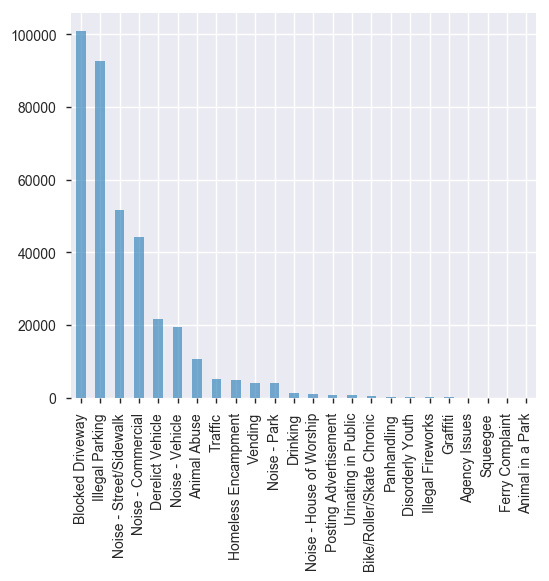

In [21]:
# plot  a bar graph of count VS  Complaint type
data['Complaint Type'].value_counts().sort_values(ascending=False).plot(kind='bar',alpha=0.6, figsize=(6,5))
plt.show()